In [1]:
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import os
drive.mount('/content/drive')

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
#from keras.optimizers import Adam,SGD,RMSprop
from keras import callbacks
from sklearn.model_selection import train_test_split

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/facial_expression/fer2013

/content/drive/MyDrive/facial_expression/fer2013


In [3]:
df = pd.read_csv('fer2013.csv')
label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'} 
img_array = np.stack(df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48, 1).astype('float32')), axis=0)
labels = df.emotion.values

X_train, X_test, y_train, y_test = train_test_split(img_array, labels, test_size=0.1, random_state=2)

X_train = X_train/255
X_test = X_test/255

In [4]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
#from tf.keras.layers.normalization import BatchNormalization

In [5]:
model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

In [6]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])

In [7]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

try:
  os.mkdir("checkpoint")
except:
  pass

file_name = 'model.h5'
checkpoint_path= os.path.join('checkpoint',file_name)
print(checkpoint_path)
call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_accuracy', 
                                                 verbose=1,
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

checkpoint/model.h5


In [9]:
callbacks_list = [early_stopping,call_back,reduce_learningrate]

In [10]:
hist = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test) ,callbacks=callbacks_list)

Epoch 1/50
1010/1010 [==============================] - 50s 17ms/step - loss: 1.9372 - accuracy: 0.2559 - val_loss: 1.7623 - val_accuracy: 0.2912

Epoch 00001: val_accuracy improved from -inf to 0.29117, saving model to checkpoint/model.h5
Epoch 2/50
1010/1010 [==============================] - 17s 17ms/step - loss: 1.7127 - accuracy: 0.3444 - val_loss: 1.8832 - val_accuracy: 0.3282

Epoch 00002: val_accuracy improved from 0.29117 to 0.32823, saving model to checkpoint/model.h5
Epoch 3/50
1010/1010 [==============================] - 17s 17ms/step - loss: 1.5816 - accuracy: 0.3924 - val_loss: 1.6356 - val_accuracy: 0.3923

Epoch 00003: val_accuracy improved from 0.32823 to 0.39231, saving model to checkpoint/model.h5
Epoch 4/50
1010/1010 [==============================] - 17s 17ms/step - loss: 1.4712 - accuracy: 0.4360 - val_loss: 1.5369 - val_accuracy: 0.4138

Epoch 00004: val_accuracy improved from 0.39231 to 0.41376, saving model to checkpoint/model.h5
Epoch 5/50
1010/1010 [=========

<Figure size 432x288 with 0 Axes>

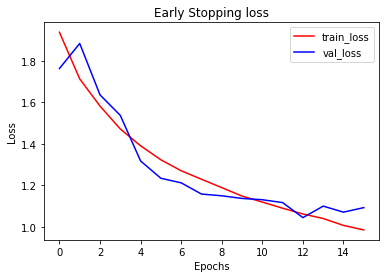

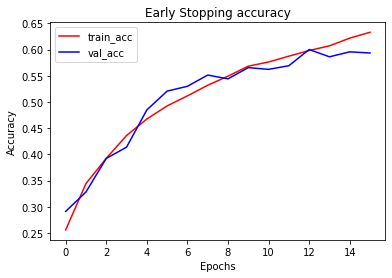

<Figure size 432x288 with 0 Axes>

In [12]:
from matplotlib import pyplot
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

epochs = range(len(train_acc))

pyplot.plot(epochs,train_loss,'r', label='train_loss')
pyplot.plot(epochs,val_loss,'b', label='val_loss')
pyplot.title('Early Stopping loss')
pyplot.ylabel('Loss')
pyplot.xlabel('Epochs')
pyplot.legend()
pyplot.figure()

pyplot.plot(epochs,train_acc,'r', label='train_acc')
pyplot.plot(epochs,val_acc,'b', label='val_acc')
pyplot.title('Early Stopping accuracy')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epochs')
pyplot.legend()
pyplot.figure()